# Complete Each Exercise

This is the learn by doing portion of the lecture. It is important to keep in mind that there are several ways to solve each of these exercises.

## 0) Conditional Logic 

1. Declare and assign a variable num to an integer value. 
2. Write a series of if, elif, else statements that will print the num you assigned. But for multiples of three print "Fizz" instead of the number and for the multiples of five print "Buzz". For numbers which are multiples of both three and five print "FizzBuzz".

In [ ]:
num = 20

## 1). FizzBuzz

Write a program that prints the numbers from 1 to 20. But for multiples of three print “Fizz” instead of the number and for the multiples of five print “Buzz”. For numbers which are multiples of both three and five print “FizzBuzz”.

In [ ]:
def fizzBuzz(num):
    
    for i in range(1,num):
        if i % 3 == 0 and i % 5 == 0:
            print('fizzBuzz')
        if i % 3 == 0:
            print("fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)
    
fizzBuzz(num)

## 2). Generate Prime Numbers
Write a program to generate a <b>list</b> of all prime numbers less than 20.
Before starting it is important to note what a prime number is.
1. A prime number has to be a positive integer
2. Divisible by exactly 2 integers (1 and itself)
3. 1 is not a prime number

In [ ]:
import sympy

def prime_gen(num = 20):
    for x in range(0,num):
        if x == 1:
            print(x)
        elif sympy.isprime(x):
            print(x)
            
prime_gen(num)

## 3). Fibonacci Sequence

Fibonacci sequence is an integer sequence characterized by the fact that every number after the first two is the sum of the two preceding ones. By definition, the first two numbers in the Fibonacci sequence are either 1 and 1 (<b>which is how I like to code it</b>), or 0 and 1, depending on the chosen starting point of the sequence, and each subsequent number is the sum of the previous two.

In [ ]:
#set beginning numbers
seq_num = 10
num1 = 1
num2 = 1

#set placeholder variable for next number in sequence
next = num2
# counter
count = 1

while count <= seq_num:
    count+=1
    print(next, end="")
    num1, num2 = num2, next
    next = num1 + num2
    print()



## 4). Word Count

For the text in the variable <b>text</b>, count how many times each word occurs

In [ ]:
# Multiple line string
text="""Mr. Collins returned into Hertfordshire soon after it had been quitted by the Gardiners and Jane; but as he took up his abode with the Lucases, his arrival was no great inconvenience to Mrs. Bennet. His marriage was now fast approaching, and she was at length so far resigned as to think it inevitable, and even repeatedly to say, in an ill-natured tone, that she "wished they might be happy." Thursday was to be the wedding day, and on Wednesday Miss Lucas paid her farewell visit; and when she rose to take leave, Elizabeth, ashamed of her mother's ungracious and reluctant good wishes, and sincerely affected herself, accompanied her out of the room. As they went downstairs together, Charlotte said:"""
print(text)

In [ ]:
import string

def word_count(text):
    word_dict = {}
    text = text.lower()
    new_text = ""
    for i in text:
        if i not in string.punctuation:
            new_text+=i
    words = new_text.split()    
    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    # print(word_dict)
    return word_dict
    
word_count(text)

### Subtasks

#### a. String Manipulation: Remove Punctuation, make all text lower()

#### b. String Manipulation: Split each word into a element in a list

#### c. Count how many times each word occurs in a list using a dictionary

## 5). Calculating a Monthly Car Payment

Your monthly payment, also called your Equated Monthly Installment (EMI) is defined by [Investopedia](https://en.wikipedia.org/wiki/Investopedia) as a fixed payment amount made by a borrower to a lender at a specified date each calendar month. Equated monthly installments are used to pay off both interest and principal each month, so that over a specified number of years, the loan is paid off in full.

A monthly payment can be calculated using an EMI formula similar to the one below.

![](images/EMI_formula.png)

Say I buy want to buy a 2019 Toyota Sienna for $31,115. I am curious how much it will cost me each month if I decide on taking out a loan to buy this new vehicle. A car dealer offers me a fixed interest rate of 7.02% over a 60 month term. How much would a monthly car payment be assuming the sales tax rate is 7.5%?

In [1]:
p = 31115 * (1.075)
r = 0.0702/12
n = 60

In [2]:
numerator = (r*(1+r)**n)
denomenator = ((1+r)**n) - 1
emi = p * (numerator/ denomenator)

print(f"{emi:.2f}")

662.64


In [3]:
p

33448.625

While this is a simplified and relatively accurate calculation (except for the sales tax being an assumption), more accurate calculations require work. Data Analytics/Science is about communicating results. We really do need how to do something more complicated (how much in total interest are we paying, how do we visualize this. This is what we will explore in future lectures)

### Challenge Question: Calculate Total Interest Paid Over the Course of a Loan

This requires knowing a few things. It is often the case

1-) The first thing is to calculate how much of the monthly payment will be paid towards interest in a month.

Interest paid

$$r*P$$ where r/12 is the interest rate (APR) and P is the principal

In [4]:
#Calculate one month of interest
interest_paid = r * p
interest_paid

195.67445625

2-) Each month, some of the monthly payment is paid towards principal and some towards interest. As principal lowers, to work out the interest you pay in the following months, you need to first calculate your new principal.

In [5]:
p - (emi - interest_paid)

32981.66092387217

3-) Repeat steps 1 and 2 until the principal reaches 0.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


term = 60

def calc_interest(P,emi,interest_rate = 0.0702):
    interest_paid = np.floor(((interest_rate/12)*p)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(p - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)

payment_list = []
for n in range(1, term + 1):
    emi,i_paid,p_paid,new_p = calc_interest(p, emi)
    payment_list.append([n, p, emi, i_paid, p_paid, new_p])
    p = np.round(new_p,2)

In [7]:
payment_list

[[1, 33448.625, 662.638532377825, 195.67, 466.97, 32981.66],
 [2, 32981.66, 662.638532377825, 192.94, 469.7, 32511.96],
 [3, 32511.96, 662.638532377825, 190.19, 472.45, 32039.51],
 [4, 32039.51, 662.638532377825, 187.43, 475.21, 31564.3],
 [5, 31564.3, 662.638532377825, 184.65, 477.99, 31086.31],
 [6, 31086.31, 662.638532377825, 181.85, 480.79, 30605.52],
 [7, 30605.52, 662.638532377825, 179.04, 483.6, 30121.92],
 [8, 30121.92, 662.638532377825, 176.21, 486.43, 29635.49],
 [9, 29635.49, 662.638532377825, 173.36, 489.28, 29146.21],
 [10, 29146.21, 662.638532377825, 170.5, 492.14, 28654.07],
 [11, 28654.07, 662.638532377825, 167.62, 495.02, 28159.05],
 [12, 28159.05, 662.638532377825, 164.73, 497.91, 27661.14],
 [13, 27661.14, 662.638532377825, 161.81, 500.83, 27160.31],
 [14, 27160.31, 662.638532377825, 158.88, 503.76, 26656.55],
 [15, 26656.55, 662.638532377825, 155.94, 506.7, 26149.85],
 [16, 26149.85, 662.638532377825, 152.97, 509.67, 25640.18],
 [17, 25640.18, 662.638532377825, 149.

In [8]:
c_names = ['Month','Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance']
payment_table = pd.DataFrame(payment_list, columns = c_names)
payment_table.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,33448.625,662.638532,195.67,466.97,32981.66
1,2,32981.660,662.638532,192.94,469.70,32511.96
2,3,32511.960,662.638532,190.19,472.45,32039.51
3,4,32039.510,662.638532,187.43,475.21,31564.30
4,5,31564.300,662.638532,184.65,477.99,31086.31


In [9]:
np.round(payment_table['Interest Paid'].sum(), 2)

6309.34

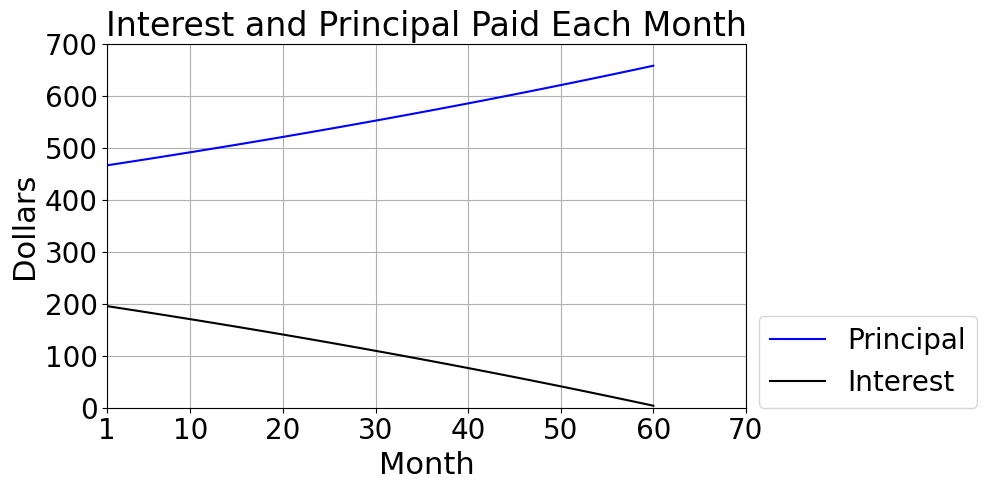

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60, 70])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
#plt.savefig('Interest_Principal.png', dpi = 1000)

In [11]:
renum = 10
num1 = 1
num2 = 1
next = num2
count = 1

while count <= renum:
    count+=1
    print(next, end='')
    num1, num2 = num2, next
    next = num1 + num2
    print()


1
2
3
5
8
13
21
34
55
89
